# **Final submission - Witold Pawlak**

## **Mounting the Drive**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing the required libraries**

In [ ]:
! pip install -q -U keras-tuner

**Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import keras_tuner as kt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Data loading**

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

In [ ]:
#tf.keras.backend.clear_session()

## **Building a Complex Neural Network Architecture**

## **Creating data loaders for greyscaled images**

In [45]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Exploring the data**

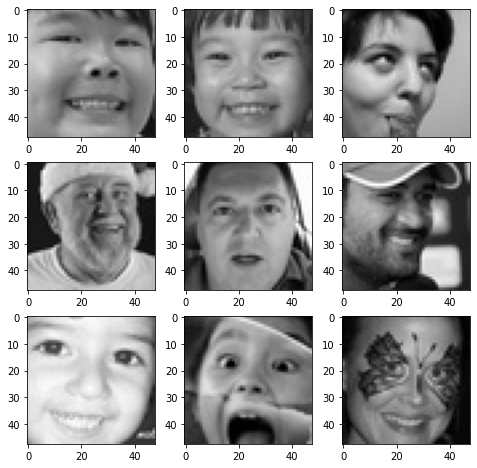

In [39]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

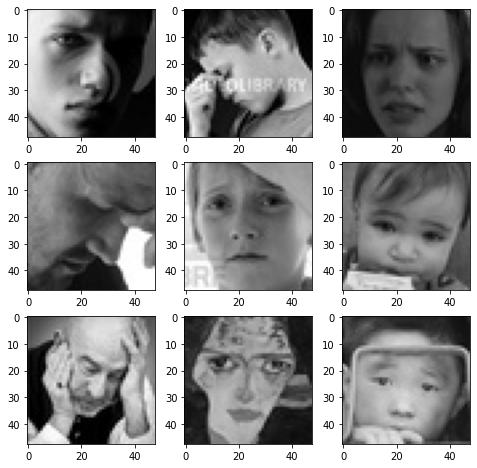

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

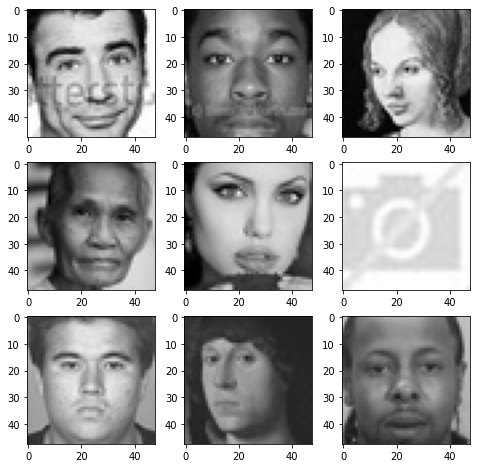

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

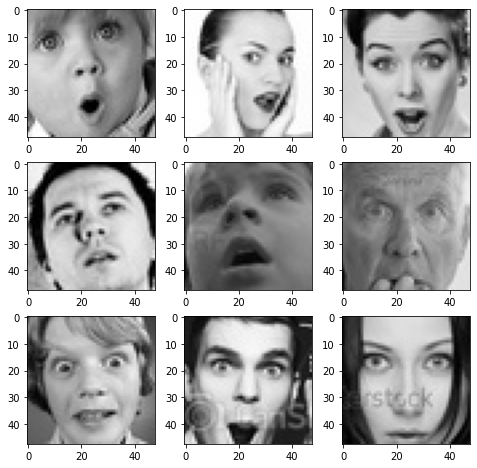

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

###**Creating function for building model with hyperparameters tuner**

In [33]:
def model_builder(hp_tuner):

  no_of_classes = 4

  model3 = Sequential()

  model3.add(Conv2D(filters=hp_tuner.Int('conv_1_filter', min_value=32, max_value=512, step=32), kernel_size=(2,2), input_shape=(48,48,1), activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(hp_tuner.Float('droput_1', min_value=0.0, max_value=0.5, step=0.1)))
  # Add 2nd CNN Block
  model3.add(Conv2D(filters=hp_tuner.Int('conv_2_filter', min_value=32, max_value=512, step=32), kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(hp_tuner.Float('droput_2', min_value=0.0, max_value=0.5, step=0.1)))
  # Add 3rd CNN Block
  model3.add(Conv2D(filters=hp_tuner.Int('conv_3_filter', min_value=32, max_value=512, step=32), kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(0.2))
  # Add 4th CNN Block
  model3.add(Conv2D(filters=hp_tuner.Int('conv_5_filter', min_value=32, max_value=512, step=32), kernel_size=(2,2), padding='same', activation='relu'))

  # Add 5th CNN Block
  model3.add(Conv2D(filters=hp_tuner.Int('conv_6_filter', min_value=32, max_value=512, step=32), kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(Flatten())

  # First fully connected layer
  model3.add(Dense(units=hp_tuner.Int('dense_1', min_value=32, max_value=512, step=32), activation='relu'))
  model3.add(Dropout(hp_tuner.Float('droput_4', min_value=0.0, max_value=0.5, step=0.1)))
  # Second fully connected layer
  model3.add(Dense(units=hp_tuner.Int('dense_2', min_value=32, max_value=512, step=32), activation='relu'))
  model3.add(BatchNormalization())
  model3.add(Dropout(hp_tuner.Float('droput_5', min_value=0.0, max_value=0.5, step=0.1)))

  model3.add(Dense(no_of_classes, activation = 'softmax'))

  hp_learning_rate = hp_tuner.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model3.compile(optimizer=SGD(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  return model3

### **Creating callbacks**

In [34]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

epochs = 50
stop_early = EarlyStopping(monitor='val_loss', patience=10)
steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model_hp_params.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr, stop_early]

### **Creating hyperparam tuner - Hyperband**

In [35]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='hp_tuner_hyperband',
                     project_name='facial-emotion-recognition')

### **Executing trials** 

In [36]:
X_train, y_train = train_set.next()

tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('conv_1_filter'))
print(best_hps.get('conv_2_filter'))
print(best_hps.get('conv_3_filter'))
#print(best_hps.get('conv_4_filter'))
print(best_hps.get('conv_5_filter'))
print(best_hps.get('conv_6_filter'))

print(best_hps.get('droput_1'))
print(best_hps.get('droput_2'))
#print(best_hps.get('droput_3'))
print(best_hps.get('droput_4'))
print(best_hps.get('droput_5'))

print(best_hps.get('dense_1'))
print(best_hps.get('dense_2'))

print(best_hps.get('learning_rate'))

352
448
320
512
256
0.1
0.5
0.1
0.1
480
288
0.001


### **Fitting the model with best hyperparameters**

In [37]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_set, epochs=50, validation_data=validation_set)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
473/473 [==============================] - 31s 63ms/step - loss: 1.5693 - accuracy: 0.2820 - val_loss: 1.3632 - val_accuracy: 0.3667
Epoch 2/50
473/473 [==============================] - 30s 62ms/step - loss: 1.4270 - accuracy: 0.3182 - val_loss: 1.3088 - val_accuracy: 0.4284
Epoch 3/50
473/473 [==============================] - 30s 64ms/step - loss: 1.3803 - accuracy: 0.3444 - val_loss: 1.2809 - val_accuracy: 0.4292
Epoch 4/50
473/473 [==============================] - 30s 63ms/step - loss: 1.3464 - accuracy: 0.3683 - val_loss: 1.2728 - val_accuracy: 0.4326
Epoch 5/50
473/473 [==============================] - 30s 63ms/step - loss: 1.3222 - accuracy: 0.3824 - val_loss: 1.2551 - val_accuracy: 0.4533
Epoch 6/50
473/473 [==============================] - 30s 63ms/step - loss: 1.2979 - accuracy: 0.4006 - val_loss: 1.2345 - val_accuracy: 0.4527
Epoch 7/50
473/473 [==============================] - 30s 63ms/step - loss: 1.2842 - accuracy: 0.4076 - val_loss: 1.2250 - val_accuracy:

### **Validating the model with auto tuner**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.86      0.38      0.52        32
           2       0.50      0.94      0.65        32
           3       0.93      0.78      0.85        32

    accuracy                           0.70       128
   macro avg       0.78      0.70      0.70       128
weighted avg       0.78      0.70      0.70       128



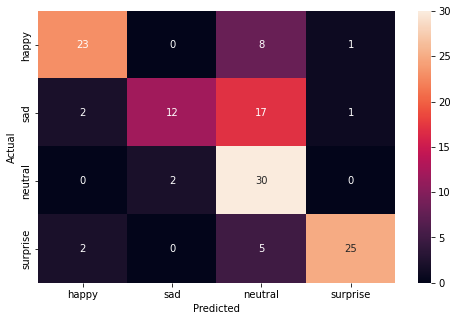

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Building the model without autotuner**

In [46]:
def model_builder_without_hparams():

  no_of_classes = 4

  model3 = Sequential()

  model3.add(Conv2D(64, kernel_size=(2,2), input_shape=(48,48,1), activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(0.2))
  # Add 2nd CNN Block
  model3.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(0.2))
  # Add 3rd CNN Block
  model3.add(Conv2D(512, kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(BatchNormalization())
  model3.add(LeakyReLU(alpha=0.1))
  model3.add(MaxPooling2D(pool_size=2))
  model3.add(Dropout(0.2))
  # Add 4th CNN Block
  model3.add(Conv2D(512, kernel_size=(2,2), padding='same', activation='relu'))

  # Add 5th CNN Block
  model3.add(Conv2D(128, kernel_size=(2,2), padding='same', activation='relu'))
  model3.add(Flatten())

  # First fully connected layer
  model3.add(Dense(256, activation='relu'))
  model3.add(Dropout(0.2))
  # Second fully connected layer
  model3.add(Dense(512, activation='relu'))
  model3.add(BatchNormalization())
  model3.add(Dropout(0.2))

  model3.add(Dense(no_of_classes, activation = 'softmax'))
  model3.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model3

In [47]:
base_model = model_builder_without_hparams()
history = base_model.fit(train_set, validation_data=validation_set, epochs=epochs, callbacks=callbacks)

Epoch 1/50
470/473 [============================>.] - ETA: 0s - loss: 1.5229 - accuracy: 0.2878
Epoch 1: saving model to model_hp_params.h5
473/473 [==============================] - 11s 20ms/step - loss: 1.5228 - accuracy: 0.2878 - val_loss: 1.5414 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/50
472/473 [============================>.] - ETA: 0s - loss: 1.2058 - accuracy: 0.4464
Epoch 2: saving model to model_hp_params.h5
473/473 [==============================] - 10s 20ms/step - loss: 1.2055 - accuracy: 0.4464 - val_loss: 1.5400 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 3/50
473/473 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.5737
Epoch 3: saving model to model_hp_params.h5
473/473 [==============================] - 10s 21ms/step - loss: 0.9811 - accuracy: 0.5737 - val_loss: 1.0692 - val_accuracy: 0.4981 - lr: 0.0010
Epoch 4/50
472/473 [============================>.] - ETA: 0s - loss: 0.9249 - accuracy: 0.6079
Epoch 4: saving model to model_hp_params.h5
47

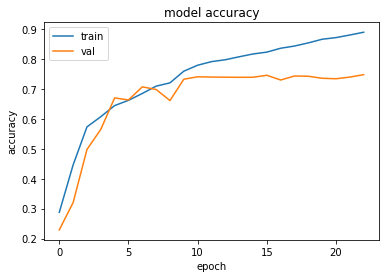

In [48]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Evaluating the Model on Test Set**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.60      0.56      0.58        32
           2       0.53      0.62      0.57        32
           3       0.97      0.88      0.92        32

    accuracy                           0.71       128
   macro avg       0.72      0.71      0.72       128
weighted avg       0.72      0.71      0.72       128



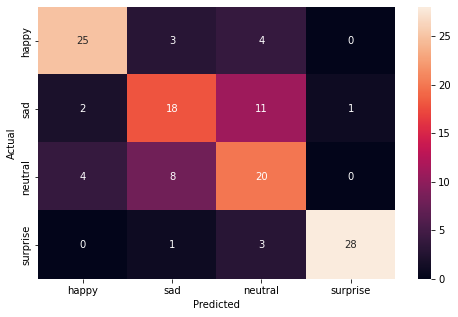

In [49]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = base_model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
tf.keras.backend.clear_session()

In [ ]:
! jupyter nbconvert Final_submission_Witold_Pawlak.ipynb

[NbConvertApp] Converting notebook Final_submission_Witold_Pawlak.ipynb to html
[NbConvertApp] Writing 1078610 bytes to Final_submission_Witold_Pawlak.html
